In [1]:
#Python 3.6.0 :: Anaconda 4.3.1 (64-bit)

In [29]:
file_hkgdp="hk_gdp.csv"

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [31]:
data_hkgdp = pd.read_csv(file_hkgdp, index_col="CCYY")
data_hkgdp = data_hkgdp[["STAT_VALUE"]] #keep only the gdp column
data_hkgdp.dropna(inplace=True)
data_hkgdp.columns = ['hkgdp'] #rename data column
data_hkgdp.index.name = 'year' #rename index
data_hkgdp.head() #peek before moving further on our analysis!

,hkgdp
year,
1962,11.7
1963,16.0
1964,11.3
1965,14.3
1966,1.5


In [64]:
## check the size of the data set before plotting
data_hkgdp.describe()

,hkgdp,D1
count,54.000000,54.000000
mean,9.690741,-0.159259
std,7.735541,7.070868
min,-5.500000,-15.700000
25%,4.500000,-4.550000
50%,9.700000,-0.050000
75%,14.850000,3.850000
max,25.800000,22.800000


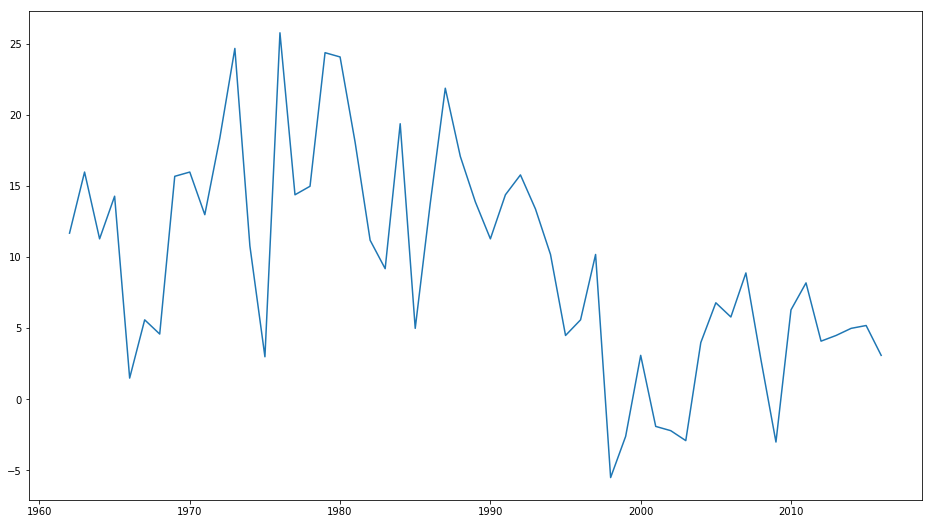

In [33]:
rcParams['figure.figsize'] = 16, 9
plt.plot(data_hkgdp)

In [34]:
### first difference
data_hkgdp['D1'] = data_hkgdp['hkgdp'] - data_hkgdp['hkgdp'].shift() 
data_hkgdp.dropna(inplace=True)
data_hkgdp.head()

,hkgdp,D1
year,,
1963,16.0,4.3
1964,11.3,-4.7
1965,14.3,3.0
1966,1.5,-12.8
1967,5.6,4.1


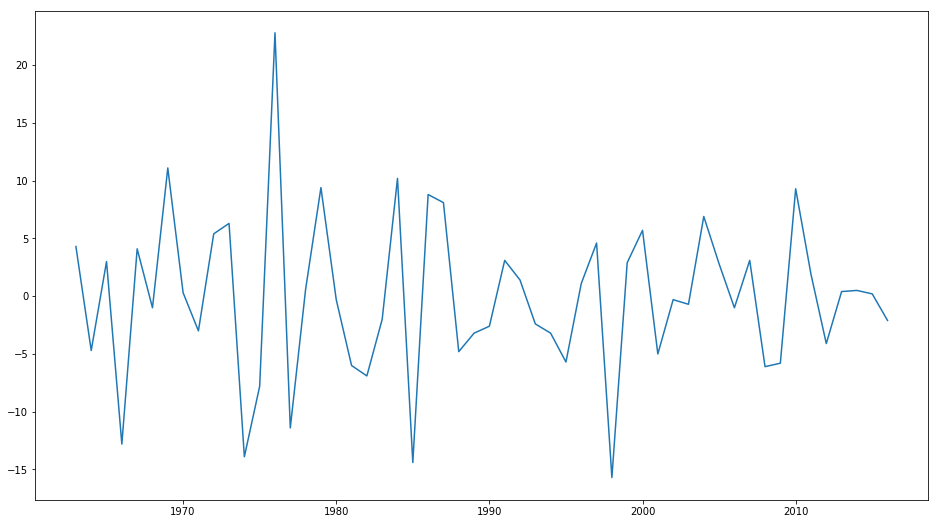

In [35]:
rcParams['figure.figsize'] = 16, 9
plt.plot(data_hkgdp['D1'])

In [36]:
from statsmodels.tsa.stattools import adfuller
ur_test = adfuller(data_hkgdp['D1'],maxlag=20)
print(ur_test)


(-9.2441627249006029, 1.5535573383718962e-15, 1, 52, {'1%': -3.562878534649522, '5%': -2.9189732840236688, '10%': -2.5973934467455622}, 203.62993702348072)


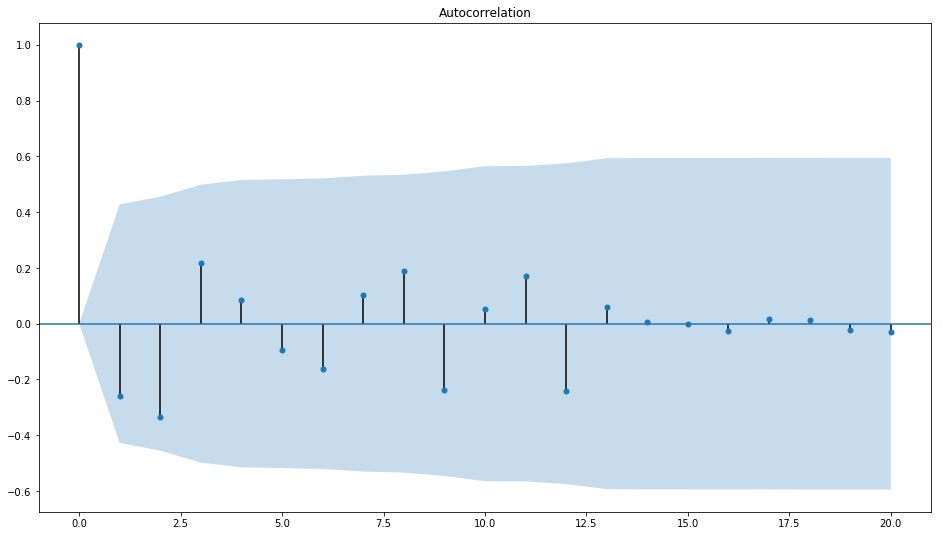

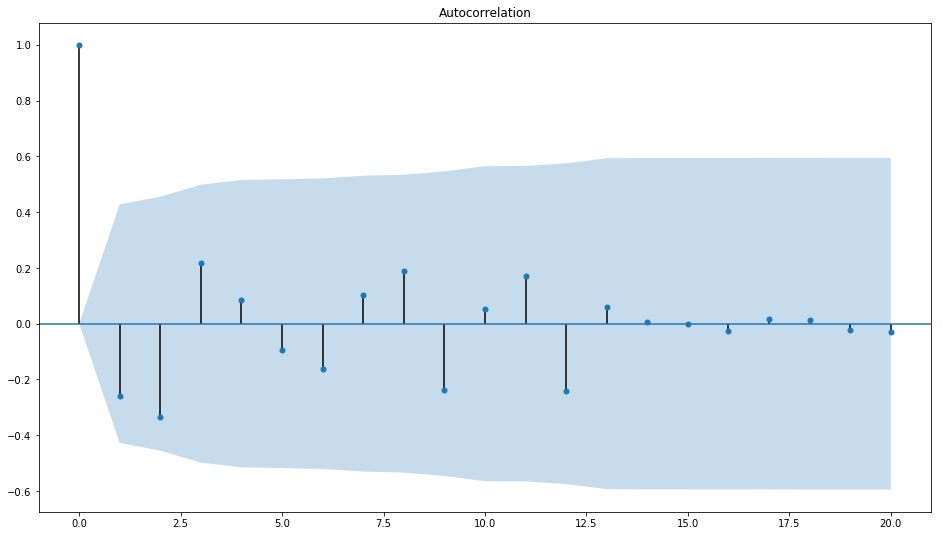

In [37]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
g_acf = acf(data_hkgdp['D1'], nlags = 20)
plot_acf(g_acf)
### MA estimate: 1 

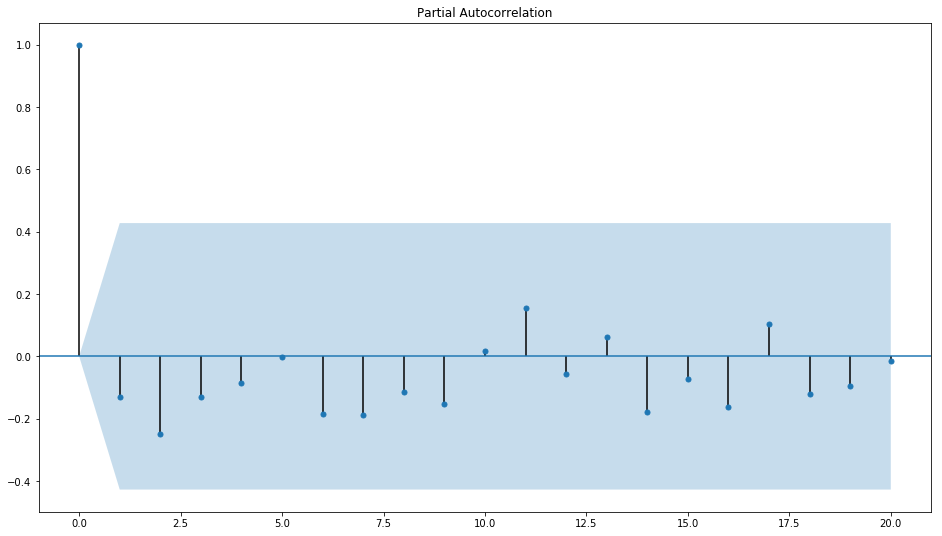

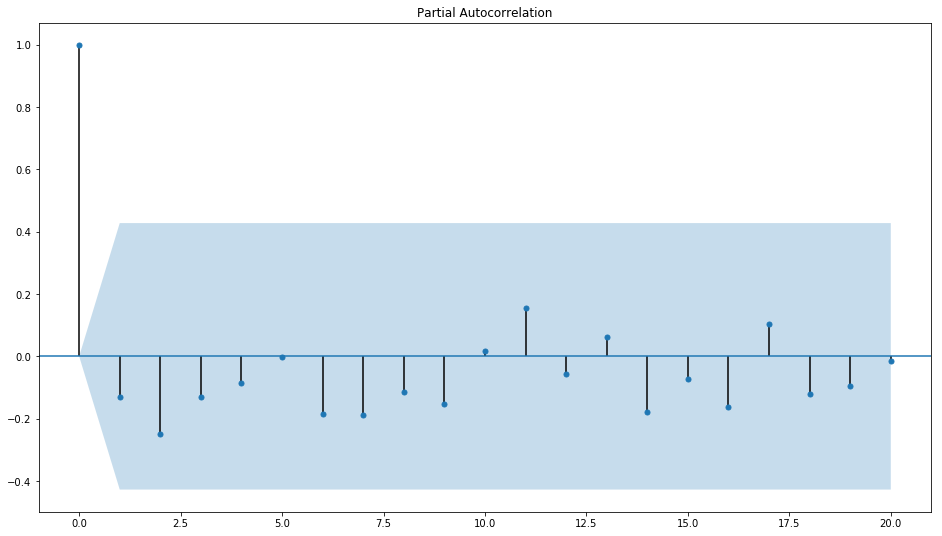

In [38]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
g_pacf = pacf(data_hkgdp['D1'], nlags = 20)
plot_pacf(g_pacf)
### AR estimate: 1

One-Step Ahead ARMA(1,1)
$$
\begin{eqnarray}
\hat{y}_{t} = \hat{\phi}_{1}{y}_{t-1} + \hat{\epsilon}_{t} - \hat{\theta}_{1}\epsilon_{t-1}
\end{eqnarray}
$$

Dynamic ARMA(1,1)
$$
\begin{eqnarray}
\hat{y}_{t} = \hat{\phi}_{1}\hat{y}_{t-1} + \hat{\epsilon}_{t} - \hat{\theta}_{1}\hat{\epsilon}_{t-1}
\end{eqnarray}
$$

In [44]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(data_hkgdp['hkgdp'], order=(1, 1, 1),dates=pd.to_datetime(data_hkgdp.index, format='%Y')) 
#prediction based on one-step ahead
arima_res = arima_model.fit()

predict_one = arima_res.predict(start='2012-01-01',end='2020-01-01')
predict_oneSeries = pd.Series(predict_one.values, index=list(range(2012,2021)))

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [45]:
#prediction based on dynamic ARIMA(1,1,1)

### forecast starts in 2012
predict_a = arima_res.predict(start='2012-01-01',end='2020-01-01',dynamic=True)
predict_aSeries = pd.Series(predict_a.values, index=list(range(2012,2021)))

### forecast starts in 2009
#predict_b = arima_res.predict(start='2009-01-01',end='2020-01-01',dynamic=True)
#predict_bSeries = pd.Series(predict_b.values, index=list(range(2009,2021)))

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [49]:
final_dat = pd.DataFrame({'line1_actual':data_hkgdp['D1'],'line2_fitted':arima_res.fittedvalues,'line3_ARIMA':predict_oneSeries,'line4_dynamicARIMA':predict_aSeries})
final_dat.tail(15) ### instead of head(), let's take a look at the end of the data frame

,line1_actual,line2_fitted,line3_ARIMA,line4_dynamicARIMA
2006,-1.0,-3.661793,NaN,NaN
2007,3.1,-2.415807,NaN,NaN
2008,-6.1,-3.798386,NaN,NaN
2009,-5.8,0.405605,NaN,NaN
2010,9.3,3.510254,NaN,NaN
2011,1.9,-2.738596,NaN,NaN
2012,-4.1,-3.361077,-3.361077,-3.361077
2013,0.4,-0.401715,-0.401715,-0.825927
2014,0.5,-0.678412,-0.678412,-0.305273
2015,0.2,-0.951497,-0.951497,-0.198345


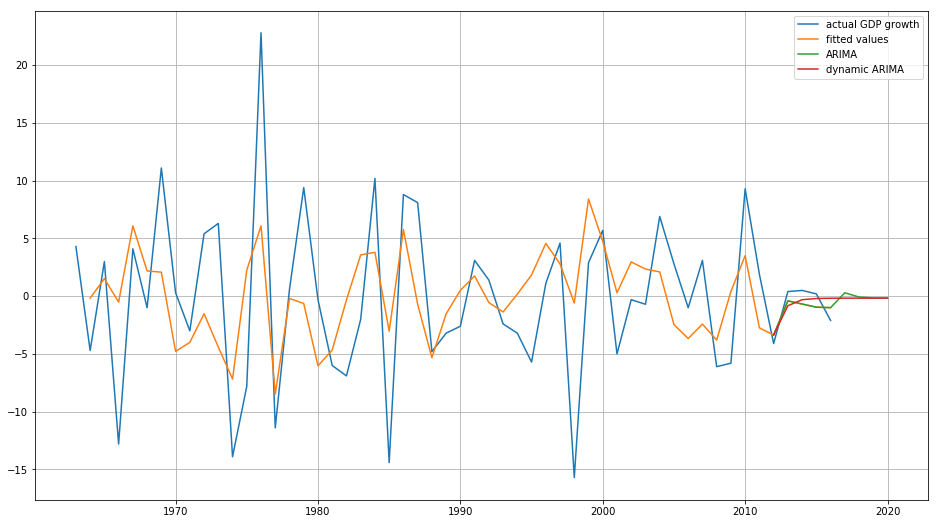

In [52]:
rcParams['figure.figsize'] = 16, 9
plt.plot(final_dat)
plt.grid(True)
plt.legend(['actual GDP growth','fitted values','ARIMA','dynamic ARIMA'])

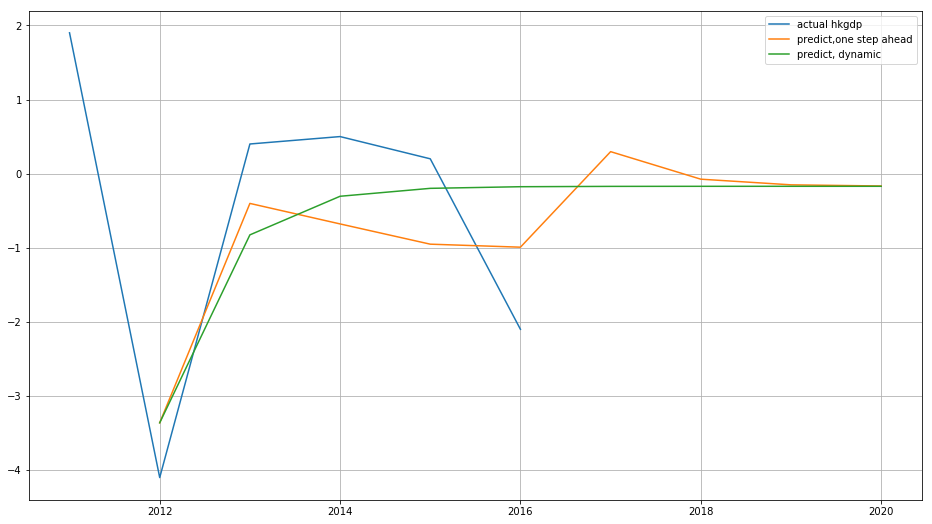

In [81]:
partial_hkgdp = data_hkgdp.loc['2010-01-01':,'D1']
comparePredictions = pd.DataFrame({'line1_actual':partial_hkgdp,'line3_ARIMA':predict_oneSeries,'line4_dynamicARIMA':predict_aSeries})
plt.plot(comparePredictions)
plt.grid(True)
plt.legend(["actual hkgdp","predict,one step ahead","predict, dynamic"])


<font color='blue'><b>Thank you for your participation!
<br>I hope you have had some fun with this material :)</b></font> 

last upate: April 24, 2017